# Prepare a model for glass classification using KNN Data Description:
RI : refractive index

Na: Sodium

Mg: Magnesium

AI: Aluminum

Si: Silicon

K:Potassium

Ca: Calcium

Ba: Barium

Fe: Iron

(unit measurement: weight percent in corresponding oxide, as are attributes 4-10)


In [3]:

# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score,train_test_split

!pip install dataprep 
from dataprep.eda import create_report

import warnings
warnings.filterwarnings('ignore') 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
#Loading dataset
glass = pd.read_csv('/content/glass.csv')
glass 

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [5]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [6]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [7]:

glass[glass.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [8]:
glass=glass.drop_duplicates()

In [11]:
glass.shape

(213, 10)

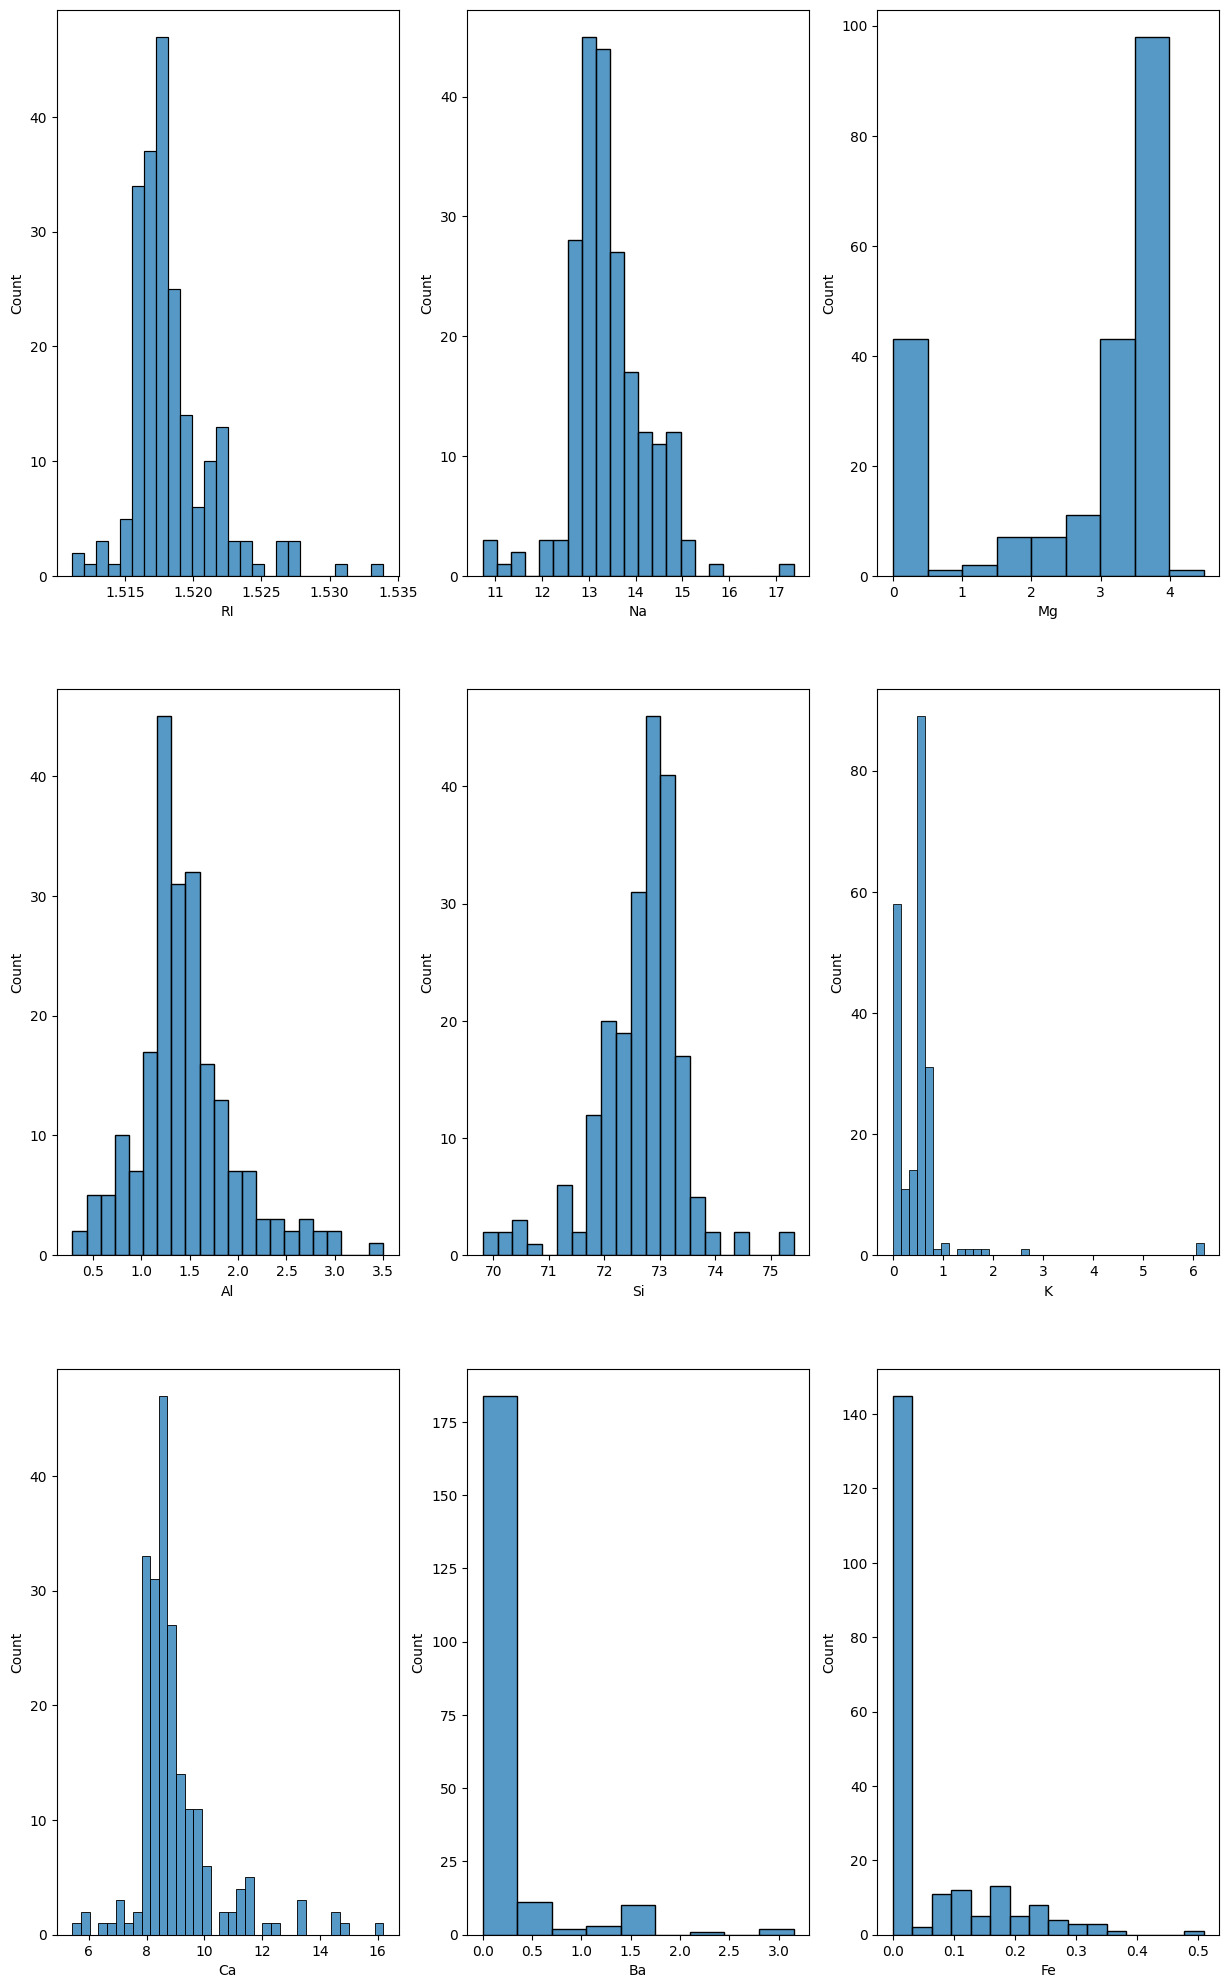

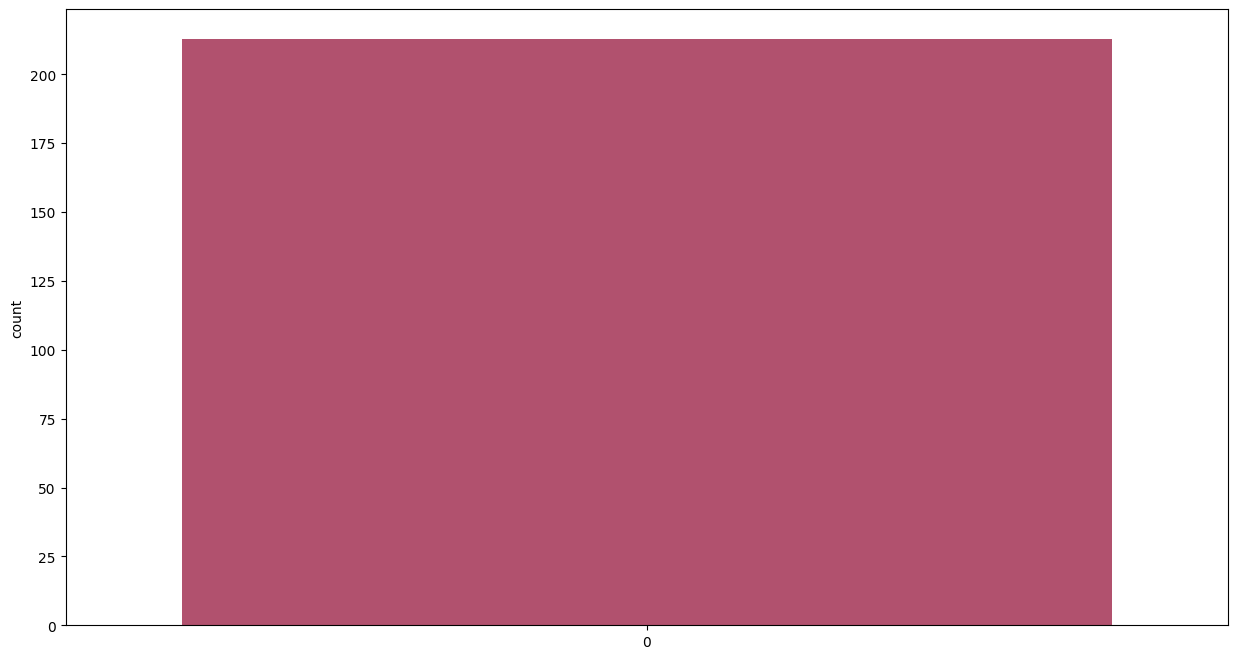

In [12]:

fig, ax =plt.subplots(3,3, figsize=(15,25)) 

sns.histplot(glass['RI'], palette='mako', ax=ax[0,0])
sns.histplot(glass['Na'], palette='mako', ax=ax[0,1])
sns.histplot(glass['Mg'], palette='mako', ax=ax[0,2])

sns.histplot(glass['Al'], palette='mako', ax=ax[1,0])
sns.histplot(glass['Si'], palette='mako', ax=ax[1,1])
sns.histplot(glass['K'], palette='mako', ax=ax[1,2])

sns.histplot(glass['Ca'], palette='mako', ax=ax[2,0])
sns.histplot(glass['Ba'], palette='mako', ax=ax[2,1])
sns.histplot(glass['Fe'], palette='mako', ax=ax[2,2])

plt.figure(figsize=(15,8))
sns.countplot(glass['Type'], palette='flare')

plt.show()

# Data Preprocessing
# Outlier Removal

<Axes: >

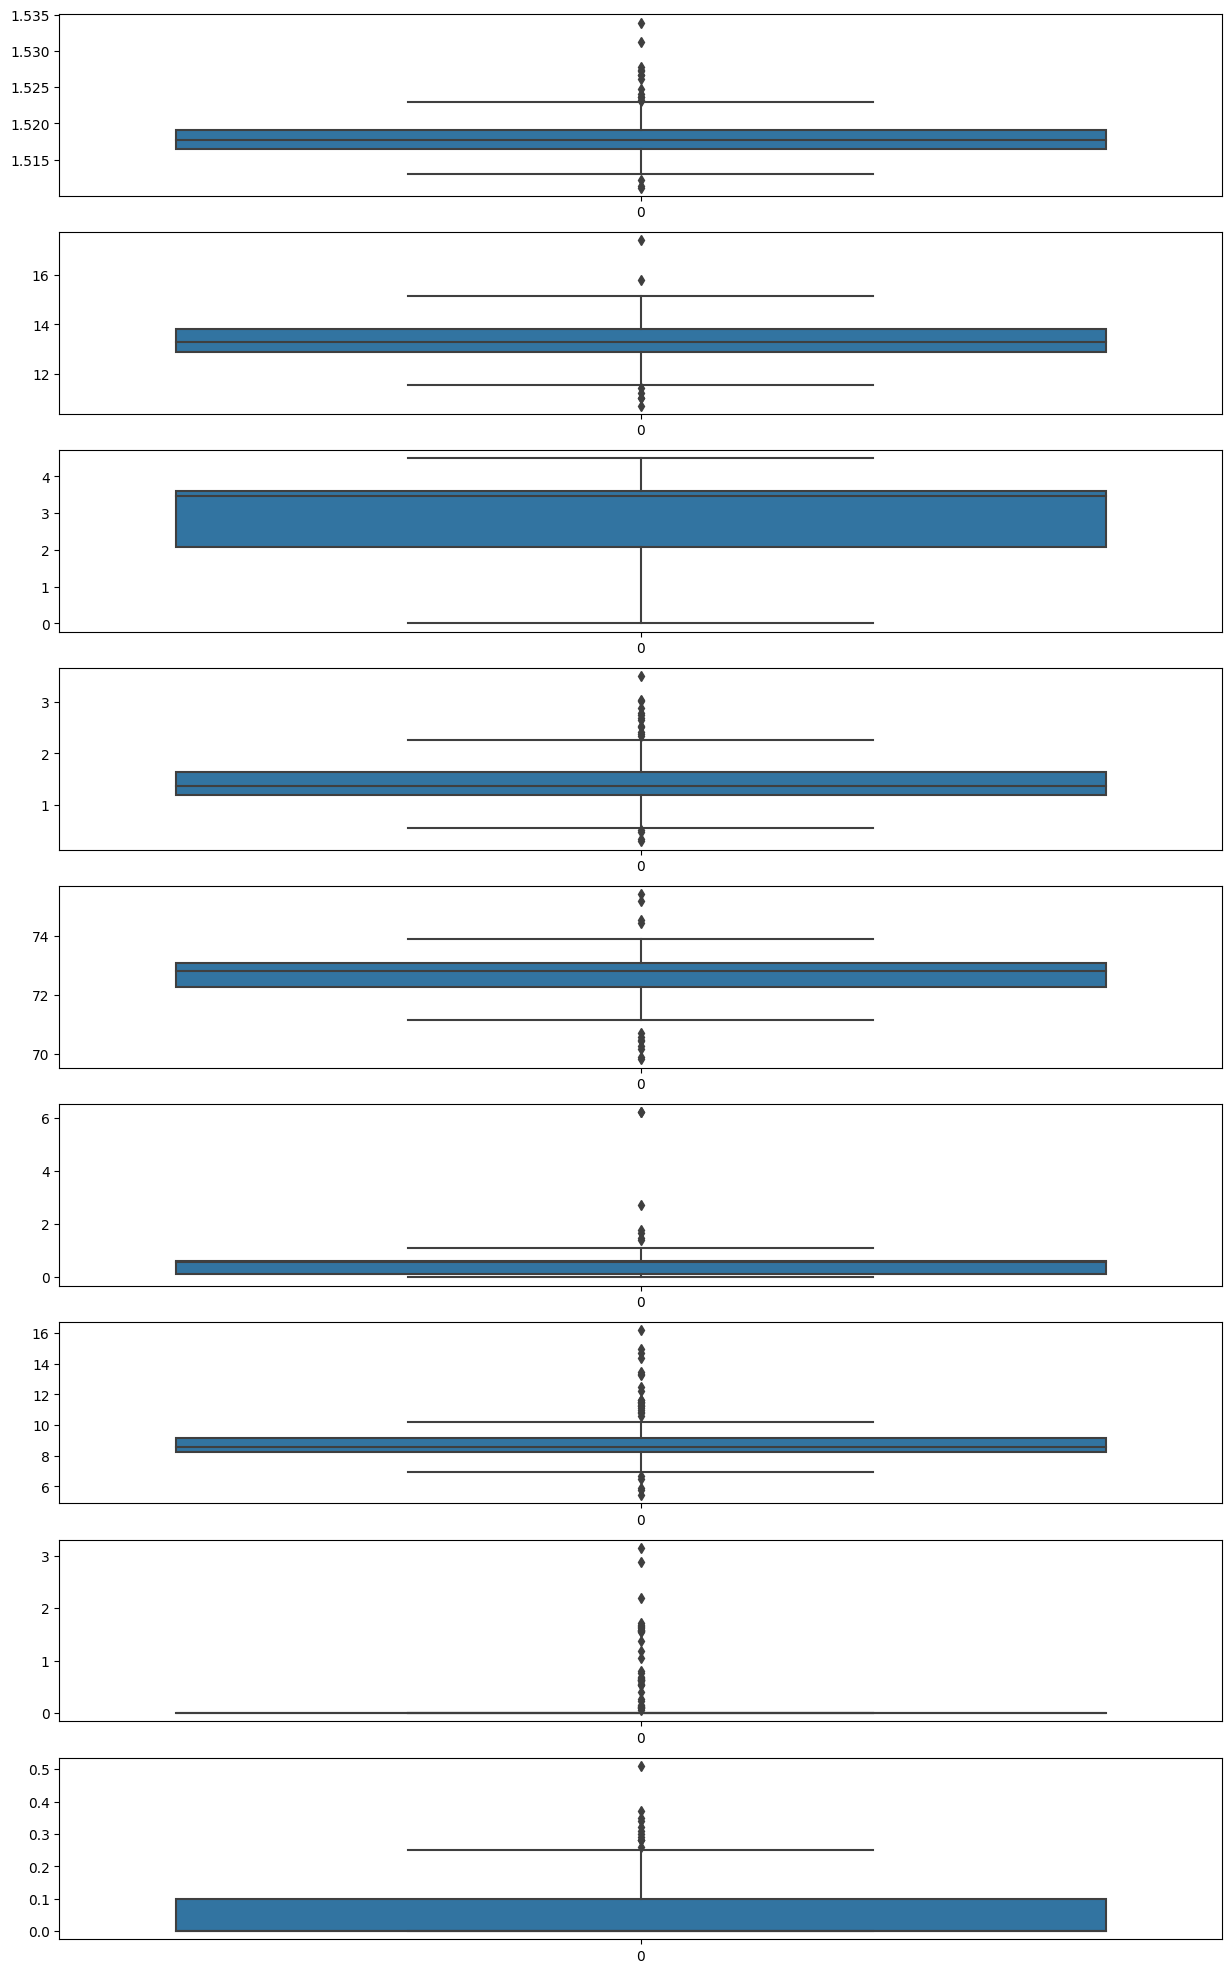

In [13]:

fig, ax =plt.subplots(9,1, figsize=(15,25)) 

sns.boxplot(glass['RI'], ax=ax[0])
sns.boxplot(glass['Na'], ax=ax[1])
sns.boxplot(glass['Mg'], ax=ax[2])

sns.boxplot(glass['Al'], ax=ax[3])
sns.boxplot(glass['Si'], ax=ax[4])
sns.boxplot(glass['K'],  ax=ax[5])

sns.boxplot(glass['Ca'], ax=ax[6])
sns.boxplot(glass['Ba'], ax=ax[7])
sns.boxplot(glass['Fe'], ax=ax[8])

In [14]:
glass1 = glass.drop('Type' , axis=1)

outliers = []

for feature in glass1.columns:
    Q1,Q3 = np.percentile(glass1[feature], [25,75])
    IQR = Q3 - Q1
    ul = Q3+1.5*IQR
    ll = Q1-1.5*IQR
    
    outlier = glass1[feature][ (glass1[feature] < ll) |  (glass1[feature] > ul)]
    
    outliers.append(outlier)

In [15]:
outliers # shows which rows are outlier for which feature

[47     1.52667
 50     1.52320
 56     1.51215
 103    1.52725
 104    1.52410
 105    1.52475
 106    1.53125
 107    1.53393
 110    1.52664
 111    1.52739
 112    1.52777
 131    1.52614
 170    1.52369
 184    1.51115
 185    1.51131
 187    1.52315
 189    1.52365
 Name: RI, dtype: float64,
 105    11.45
 106    10.73
 110    11.23
 111    11.02
 166    11.03
 184    17.38
 189    15.79
 Name: Na, dtype: float64,
 Series([], Name: Mg, dtype: float64),
 21     0.29
 38     0.47
 50     0.51
 163    3.50
 171    3.04
 172    3.02
 184    0.34
 191    2.38
 192    2.79
 195    2.68
 196    2.54
 197    2.34
 198    2.66
 199    2.51
 202    2.42
 208    2.74
 209    2.88
 Name: Al, dtype: float64,
 103    70.57
 106    69.81
 107    70.16
 109    74.45
 163    69.89
 171    70.48
 172    70.70
 180    74.55
 184    75.41
 188    70.26
 189    70.43
 201    75.18
 Name: Si, dtype: float64,
 163    1.68
 171    6.21
 172    6.21
 185    1.76
 186    1.46
 201    2.70
 207    1.41
 Na

In [16]:
outliers_df = pd.DataFrame(outliers) 
outliers_df  

,47,50,56,103,104,105,106,107,110,111,...,211,212,213,5,44,71,118,135,145,162
RI,1.52667,1.5232,1.51215,1.52725,1.5241,1.52475,1.53125,1.53393,1.52664,1.52739,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Na,NaN,NaN,NaN,NaN,NaN,11.45000,10.73000,NaN,11.23000,11.02000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Al,NaN,0.5100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Si,NaN,NaN,NaN,70.57000,NaN,NaN,69.81000,70.16000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ca,NaN,NaN,NaN,11.64000,10.7900,13.24000,13.30000,16.19000,14.68000,14.96000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ba,NaN,NaN,NaN,NaN,NaN,NaN,3.15000,NaN,NaN,NaN,...,1.64,1.57,1.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fe,NaN,NaN,0.31000,NaN,NaN,0.34000,0.28000,NaN,NaN,NaN,...,NaN,NaN,NaN,0.26,0.3,0.32,0.29,0.28,0.35,0.37


In [17]:
np.isfinite(outliers_df) # true = outlier
#eg: row 47 is outlier for column RI 
#eg: row 50 is outlier for column RI 

,47,50,56,103,104,105,106,107,110,111,...,211,212,213,5,44,71,118,135,145,162
RI,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
Na,False,False,False,False,False,True,True,False,True,True,...,False,False,False,False,False,False,False,False,False,False
Mg,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Al,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Si,False,False,False,True,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
K,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Ca,False,False,False,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
Ba,False,False,False,False,False,False,True,False,False,False,...,True,True,True,False,False,False,False,False,False,False
Fe,False,False,True,False,False,True,True,False,False,False,...,False,False,False,True,True,True,True,True,True,True


In [18]:
outlier_count = np.isfinite(outliers_df).sum() # shows which row is outlier for how many features
outlier_count 

47     1
50     2
56     2
103    3
104    2
      ..
71     1
118    1
135    1
145    1
162    1
Length: 78, dtype: int64

In [19]:
outlier_count_df = pd.DataFrame(outlier_count)
outlier_count_df  

,0
47,1
50,2
56,2
103,3
104,2
...,...
71,1
118,1
135,1
145,1


In [20]:
outlier_count_df['new_index'] = range(0, len(outlier_count_df))
outlier_count_df = outlier_count_df.rename(columns={0:'outlier_count'})
outlier_count_df['index'] = outlier_count_df.index 
outlier_count_df = outlier_count_df.set_index('new_index')  
outlier_count_df

,outlier_count,index
new_index,,
0,1,47
1,2,50
2,2,56
3,3,103
4,2,104
...,...,...
73,1,71
74,1,118
75,1,135


In [21]:

index = []
for i in range (0, len(outlier_count_df)):
    if outlier_count_df['outlier_count'][i] > 2:
        index.append(outlier_count_df['index'][i])

In [22]:

len(index) # 14 entries are such that they have values which are outliers for more than 2 columns

14

In [23]:

index

[103, 105, 106, 107, 110, 111, 184, 185, 189, 163, 171, 172, 186, 207]

In [24]:
glass_df = glass.drop([103, 105, 106, 107, 110, 111, 184, 185, 189, 163, 171, 172, 186, 207])

In [25]:
glass_df.shape

(199, 10)

# Test Train Split & K fold cross validation

In [26]:
x = glass_df.drop(['Type'] , axis=1)
y = glass_df[['Type']]

# Standardize the Variables




In [27]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [28]:
x = std.fit_transform(x) # not transforming y since it is categorical

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=7)

In [30]:

print('Shape of X_train: ' ,x_train.shape)
print('Shape of X_test: ' , x_test.shape)
print('Shape of y_train: ' ,y_train.shape)
print('Shape of y_test' ,y_test.shape)

Shape of X_train:  (139, 9)
Shape of X_test:  (60, 9)
Shape of y_train:  (139, 1)
Shape of y_test (60, 1)


In [31]:
num_folds = 10
kfold = KFold(n_splits=10, shuffle=True) 

In [32]:
model = KNeighborsClassifier(n_neighbors=3) 
results = cross_val_score(model, x, y, cv=kfold) 

# we are using x and y instead of x_train, y_train because we are using k-fold cross validation
     

In [33]:
print('Accuracy with k = 3 and k fold validation', np.round(results.mean(),3))

Accuracy with k = 3 and k fold validation 0.688


In [34]:
# if you want to use train test split then
model = KNeighborsClassifier(n_neighbors=3) # K = 3
model.fit(x_train,y_train)
pred_y = model.predict(x_test)
accuracy_score(y_test, pred_y)
print('Accuracy with k = 3 and train test split', accuracy_score(y_test, pred_y))

Accuracy with k = 3 and train test split 0.6666666666666666


# Now lets do Grid search for choosing the best Value of K

In [35]:

n_neigh = np.array(range(1,40,2)) #odd number of k
param_grid = dict(n_neighbors=n_neigh) 

In [36]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold)
grid.fit(x, y)  
     

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39])})

In [37]:
print(grid.best_score_)
print(grid.best_params_)

0.7244736842105263
{'n_neighbors': 1}


In [38]:

n_neigh = np.array(range(3,40,2)) #odd number of k excluding 1
param_grid = dict(n_neighbors=n_neigh) 

model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold)
grid.fit(x, y)  

print(grid.best_score_)
print(grid.best_params_) 

0.7094736842105264
{'n_neighbors': 3}


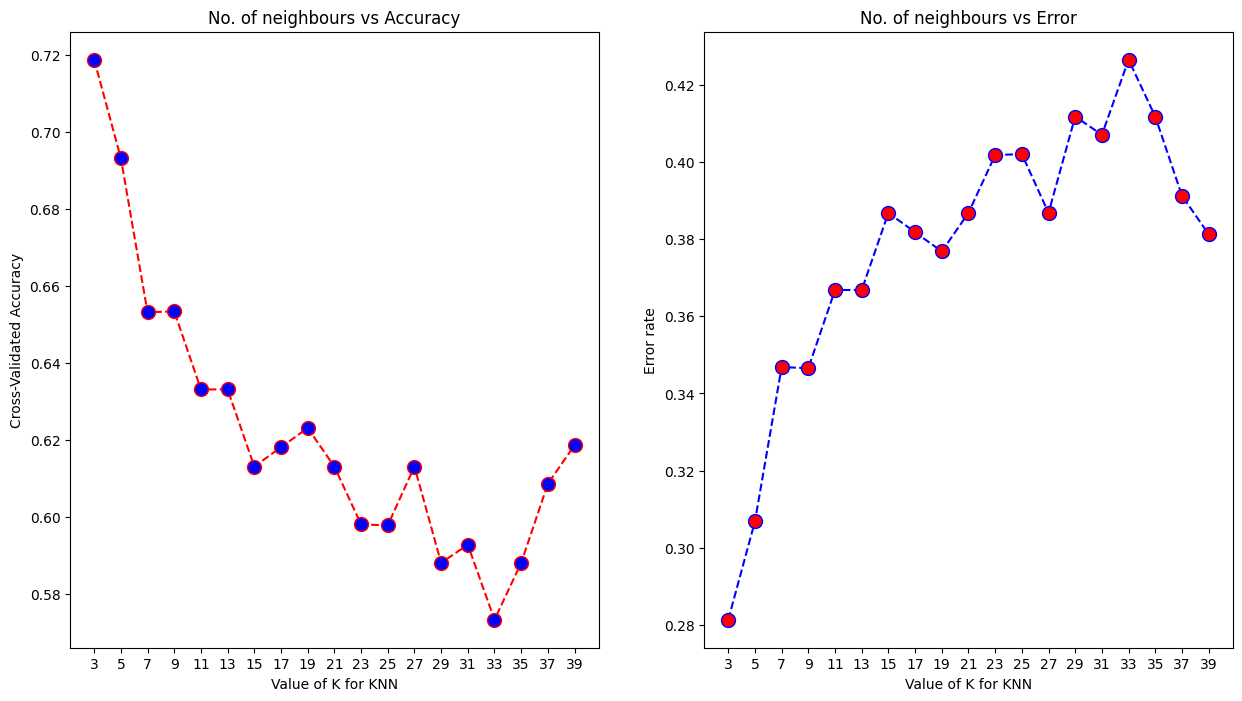

In [39]:
import matplotlib.pyplot as plt 
%matplotlib inline

# choose k between 3 to 39
k_range =np.array(range(3,40,2))
k_scores = []
error_rate = []

# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=10)
    k_scores.append(scores.mean())
    
    error_rate.append((1-scores.mean()))
      

        
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
plt.plot(k_range, k_scores, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.xticks(k_range)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('No. of neighbours vs Accuracy')

plt.subplot(1,2,2)
plt.plot(k_range , error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10) 
plt.xticks(k_range)
plt.xlabel('Value of K for KNN')
plt.ylabel('Error rate')
plt.title('No. of neighbours vs Error')

plt.show() 

In [40]:

num_folds = 10
kfold = KFold(n_splits=10, shuffle=True)   

model = KNeighborsClassifier(n_neighbors=3) 
results = cross_val_score(model, x, y, cv=kfold)

print('Batchwise accuracy','\n',results, '\n') 
print('Overall accuracy', np.round(results.mean(),3))

Batchwise accuracy 
 [0.55       0.7        0.75       0.75       0.5        0.6
 0.85       0.8        0.6        0.78947368] 

Overall accuracy 0.689


In [41]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, y_train)
pred_y = model.predict(x_test)
accuracy_score(y_test, pred_y)

0.6666666666666666

In [42]:

print(classification_report(y_test, pred_y)) 
     

              precision    recall  f1-score   support

           1       0.52      0.83      0.64        18
           2       0.78      0.61      0.68        23
           3       0.00      0.00      0.00         7
           5       1.00      1.00      1.00         3
           6       0.67      1.00      0.80         2
           7       1.00      0.86      0.92         7

    accuracy                           0.67        60
   macro avg       0.66      0.72      0.67        60
weighted avg       0.64      0.67      0.64        60



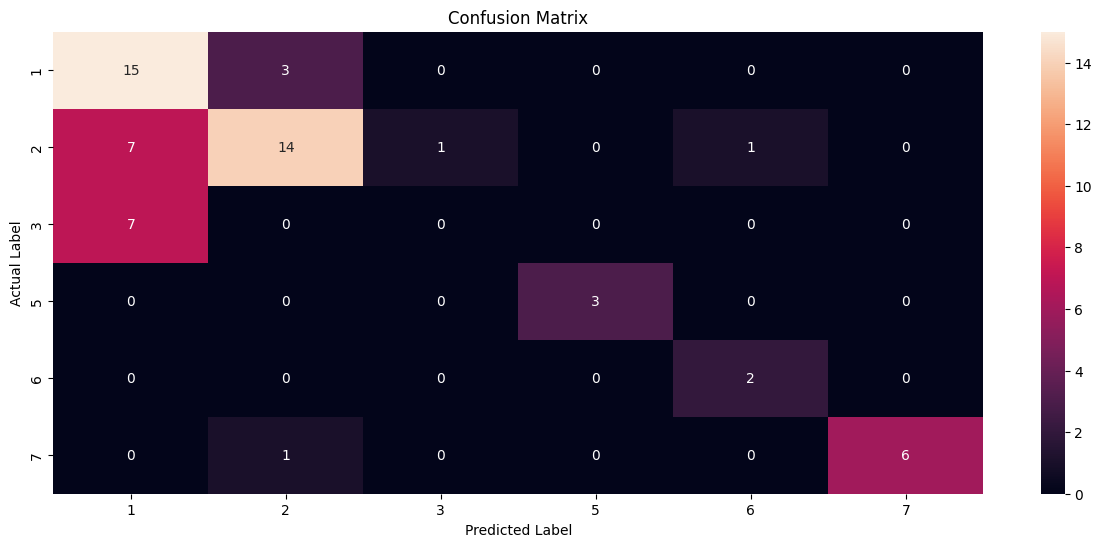

In [43]:
cm_df = confusion_matrix(y_test, pred_y)
class_label = ['1','2','3','5','6','7'] #class 4 is absent in dataset

df_cm = pd.DataFrame(cm_df, index = class_label, columns = class_label)
plt.figure(figsize=(15,6))
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

The duplicated values and the outliers were removed from the dataset

Standard Scaler was used

Grid Serach was used to find the optimal k value for the KNN algorithm

The accuracy of KNN models was greatest when k=3

# KNN Assignment Zoo data

In [44]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score,train_test_split

import warnings
warnings.filterwarnings('ignore') 
     

In [45]:

#Loading dataset
zoo = pd.read_csv('/content/Zoo.csv')
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [46]:

zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [47]:
zoo.shape

(101, 18)

In [48]:
zoo.duplicated().sum()

0

# Data visualisation

correlation metric

Correlation is a statistical measure that expresses the extent to which two variables are linearly related.

Dython automatically finds which features are categorical and which are numerical, compute a relevant measure of association between each and every feature, and plot it all as an easy-to-read heat-map. And all this is done with a single line:

<Axes: ylabel='count'>

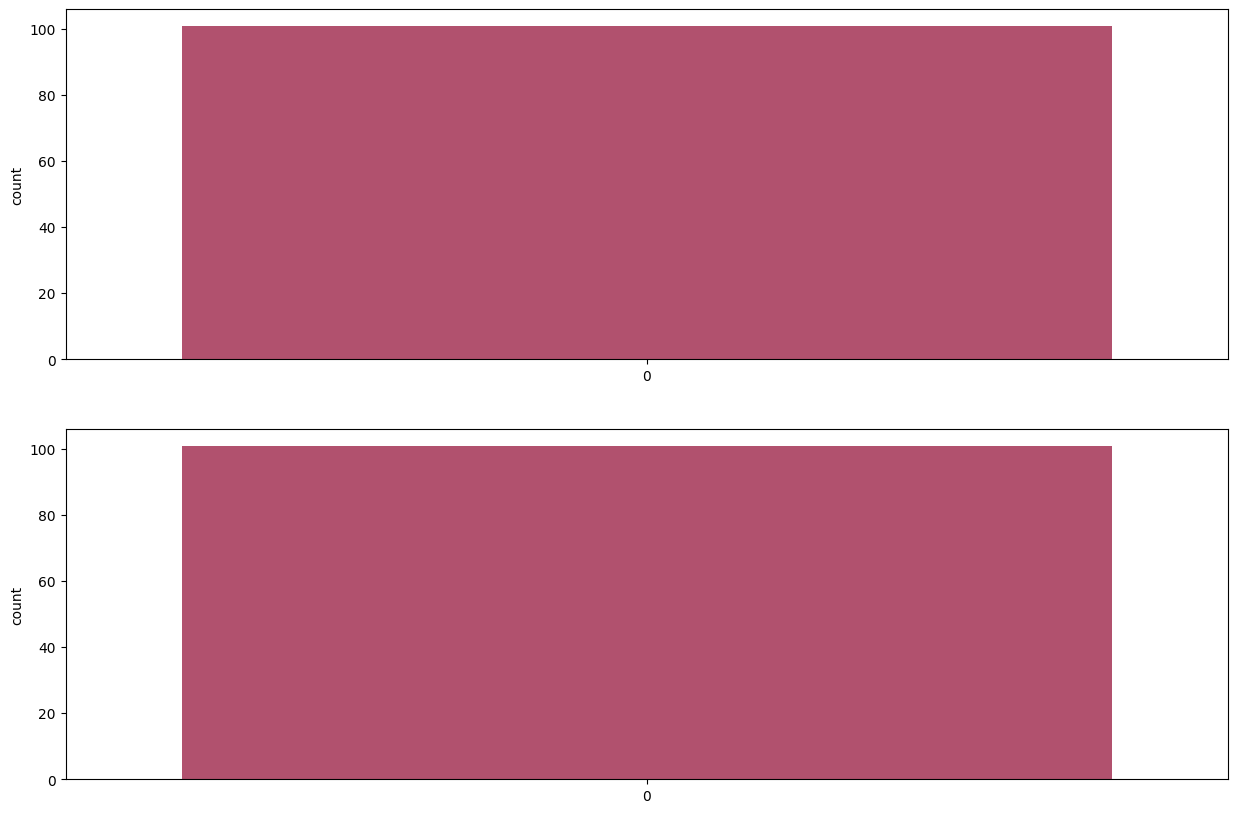

In [68]:

fig, ax =plt.subplots(2,1, figsize=(15,10)) 

sns.countplot(zoo['type'], palette='flare' , ax=ax[0])
sns.countplot(zoo['legs'], palette='flare', ax=ax[1])

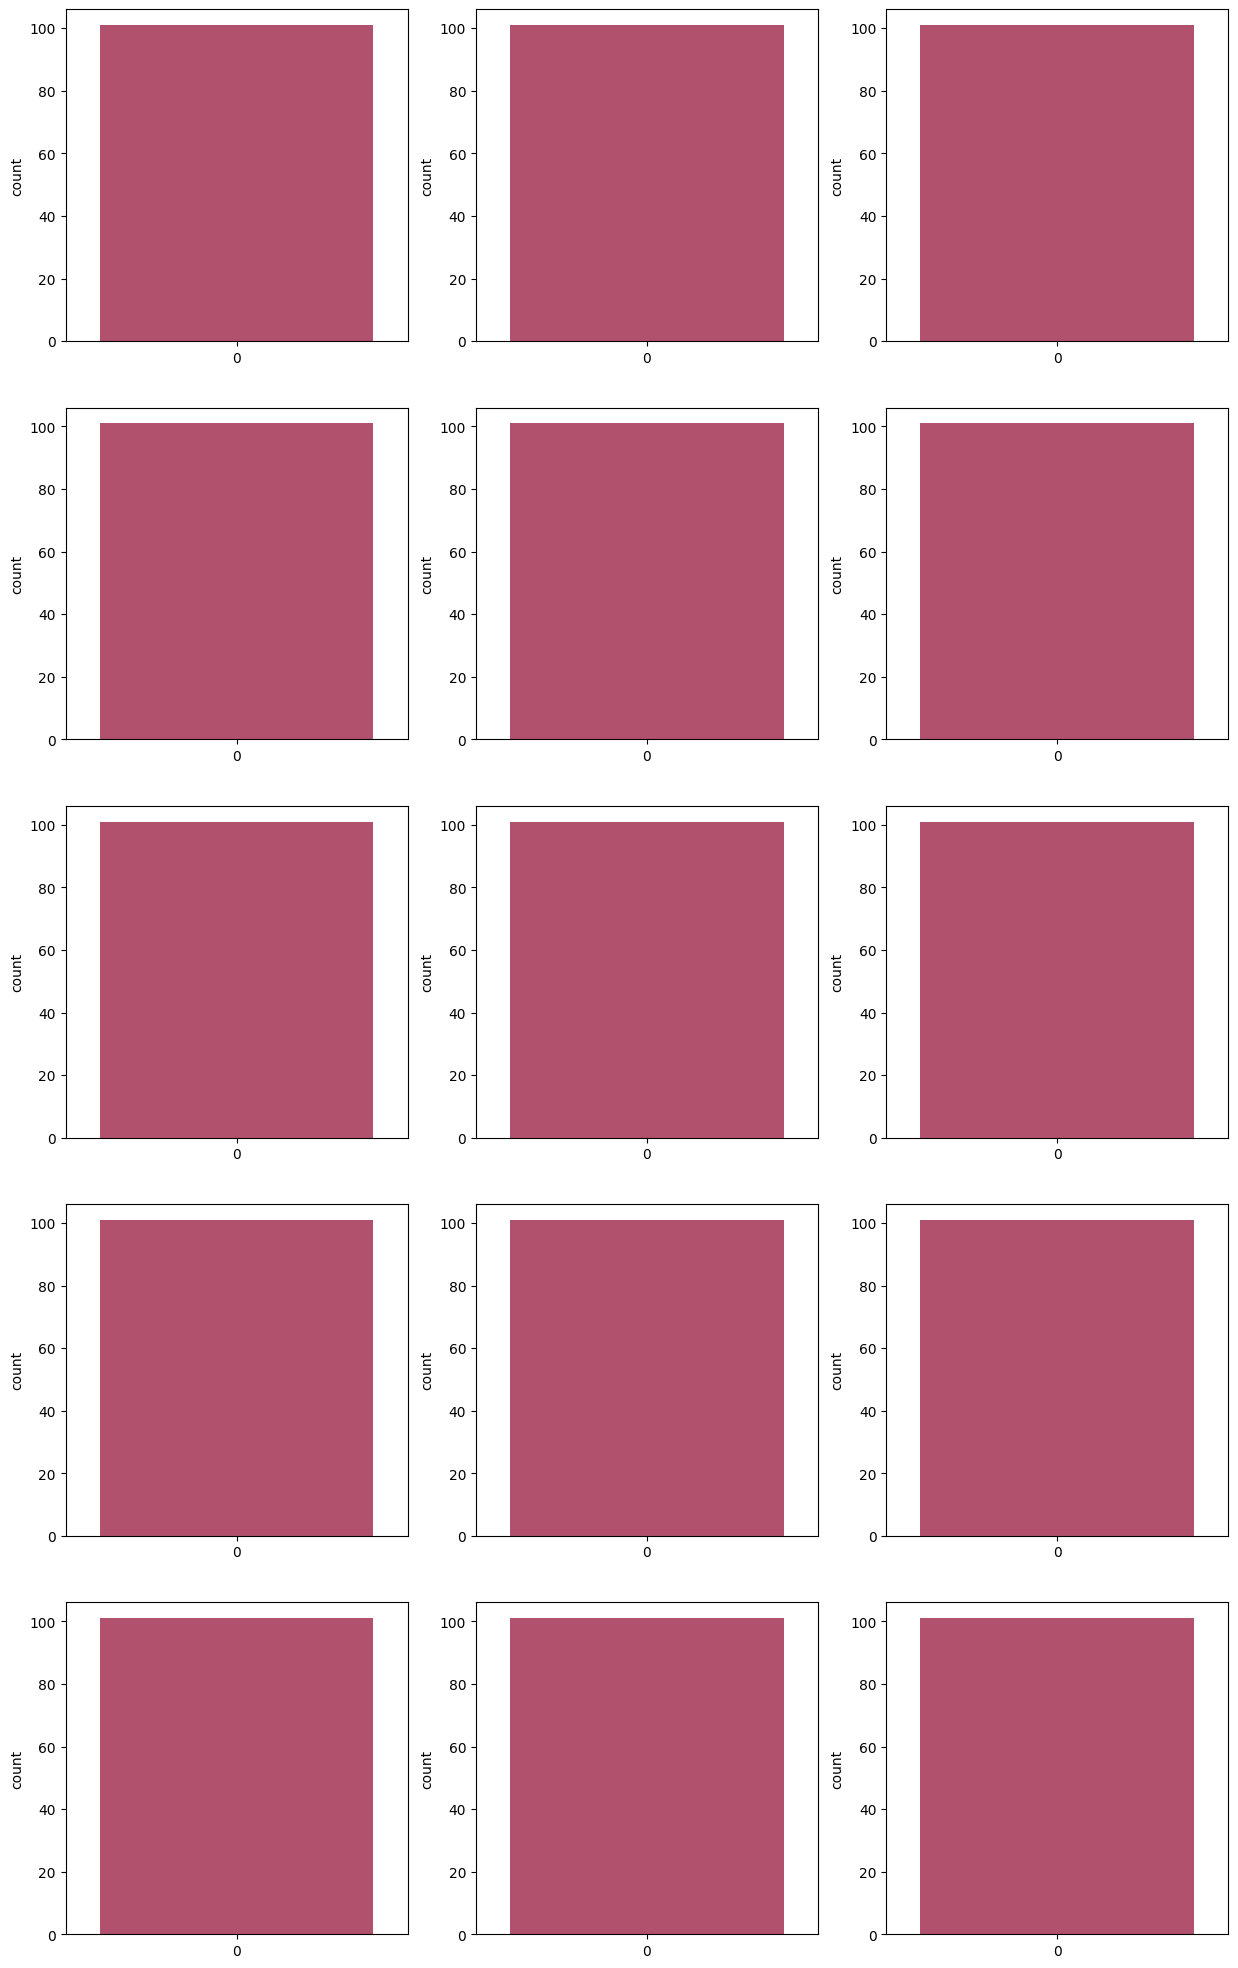

In [69]:

fig, ax =plt.subplots(5,3, figsize=(15,25)) 


sns.countplot(zoo['hair'], palette='flare', ax=ax[0,0])
sns.countplot(zoo['feathers'], palette='flare', ax=ax[0,1])
sns.countplot(zoo['eggs'], palette='flare', ax=ax[0,2])

sns.countplot(zoo['milk'], palette='flare', ax=ax[1,0])
sns.countplot(zoo['airborne'], palette='flare', ax=ax[1,1])
sns.countplot(zoo['aquatic'], palette='flare', ax=ax[1,2])

sns.countplot(zoo['predator'], palette='flare', ax=ax[2,0])
sns.countplot(zoo['toothed'], palette='flare', ax=ax[2,1])
sns.countplot(zoo['backbone'], palette='flare', ax=ax[2,2])

sns.countplot(zoo['breathes'], palette='flare', ax=ax[3,0])
sns.countplot(zoo['venomous'], palette='flare', ax=ax[3,1])
sns.countplot(zoo['fins'], palette='flare', ax=ax[3,2])

sns.countplot(zoo['tail'], palette='flare', ax=ax[4,0])
sns.countplot(zoo['domestic'], palette='flare', ax=ax[4,1])
sns.countplot(zoo['catsize'], palette='flare', ax=ax[4,2]);

# Data Pre-Processing

# Test Train Split & K fold cross validation

In [53]:

x = zoo.drop(['type' , 'animal name'] , axis=1)
y = zoo[['type']] 

In [54]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=7)

In [55]:

print('Shape of X_train: ' ,x_train.shape)
print('Shape of X_test: ' , x_test.shape)
print('Shape of y_train: ' ,y_train.shape)
print('Shape of y_test' ,y_test.shape)
     

Shape of X_train:  (70, 16)
Shape of X_test:  (31, 16)
Shape of y_train:  (70, 1)
Shape of y_test (31, 1)


# How to choose the optimum value for K(neighbours)?

Initially lets take random k value..

K = 5

In [56]:
num_folds = 10
kfold = KFold(n_splits=10)

In [57]:
model = KNeighborsClassifier(n_neighbors=5) # K = 5
results = cross_val_score(model, x, y, cv=kfold) 
# we are using x and y instead of x_train, y_train because we are using k-fold cross validation

In [58]:
print('Accuracy with k = 5 and k fold validation', np.round(results.mean(),3))
     
     

Accuracy with k = 5 and k fold validation 0.88


In [59]:

# if you want to use train test split then
model = KNeighborsClassifier(n_neighbors=5) # K = 5
model.fit(x_train,y_train)
pred_y = model.predict(x_test)
accuracy_score(y_test, pred_y)
print('Accuracy with k = 5 and train test split', accuracy_score(y_test, pred_y))

Accuracy with k = 5 and train test split 0.9032258064516129


# Now lets do Grid search for choosing the best Value of K

In [60]:
n_neigh = np.array(range(1,40,2)) #odd number of k
param_grid = dict(n_neighbors=n_neigh) 

In [61]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold)
grid.fit(x, y)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39])})

In [62]:
print(grid.best_score_)
print(grid.best_params_) 
     

0.9800000000000001
{'n_neighbors': 1}


In [63]:
n_neigh = np.array(range(3,40,2)) #odd number of k excluding 1
param_grid = dict(n_neighbors=n_neigh) 

model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold)
grid.fit(x, y)  

print(grid.best_score_)
print(grid.best_params_) 

0.9400000000000001
{'n_neighbors': 3}


But why we are choosing odd values for k?

When the value of K is set to even, a situation may arise in which the elements from both groups surrounding new datapoint are equal.

In this condition, the model would be unable to do the correct classification. Here the model will randomly assign any of the two classes to this new unknown data.

Choosing an odd value for K is preferred because such a state of equality between the two classes would never occur here. Due to the fact that one of the two groups would still be in the majority, the value of K is selected as odd.

Visualizing performance against no. of neighbours(K)

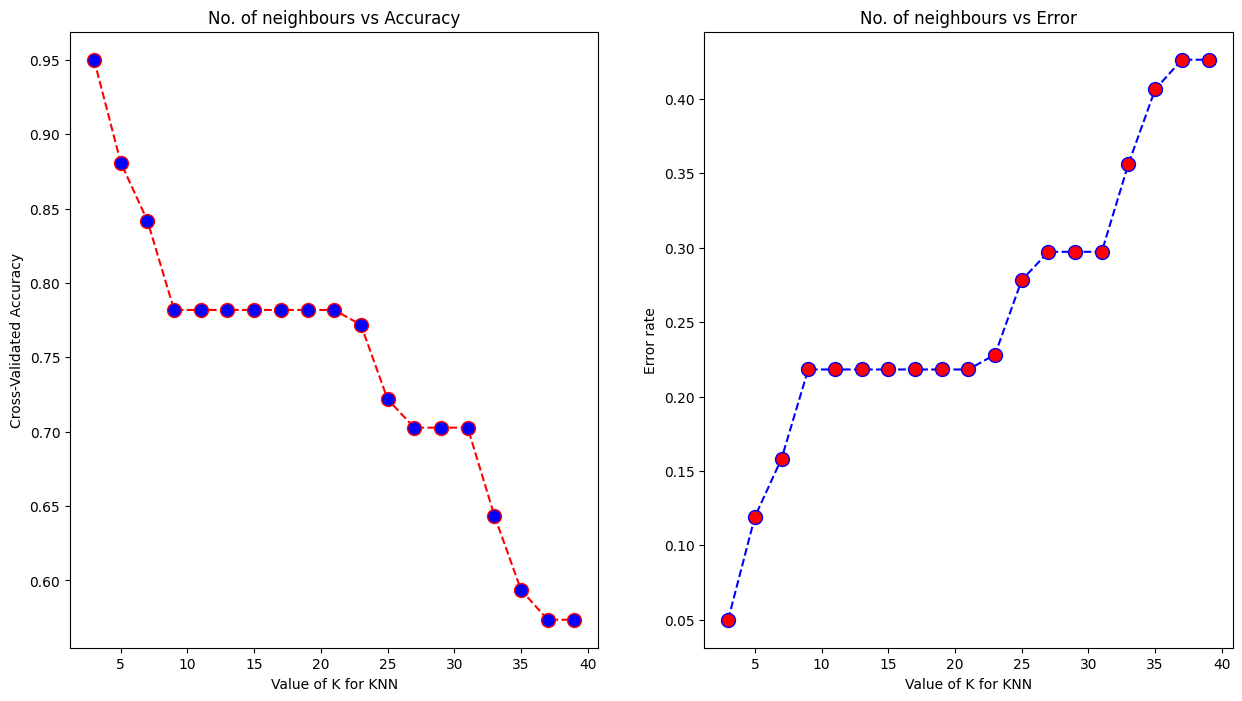

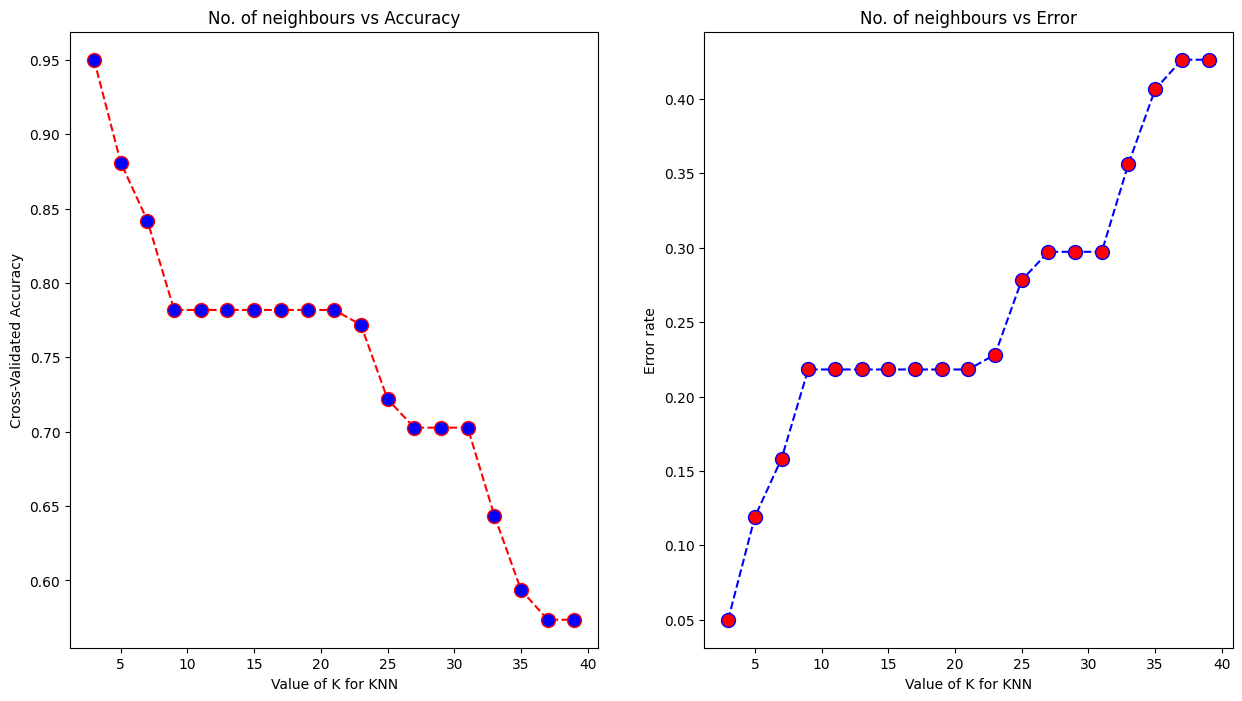

In [64]:
import matplotlib.pyplot as plt 
%matplotlib inline

# choose k between 3 to 39
k_range =np.array(range(3,40,2))
k_scores = []
error_rate = []

# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=10)
    k_scores.append(scores.mean())
    
    error_rate.append((1-scores.mean()))
      

        
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
plt.plot(k_range, k_scores, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('No. of neighbours vs Accuracy')

plt.subplot(1,2,2)
plt.plot(k_range , error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10) 
plt.xlabel('Value of K for KNN')
plt.ylabel('Error rate')
plt.title('No. of neighbours vs Error')

plt.show() 
     
import matplotlib.pyplot as plt 
%matplotlib inline

# choose k between 3 to 39
k_range =np.array(range(3,40,2))
k_scores = []
error_rate = []

# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=10)
    k_scores.append(scores.mean())
    
    error_rate.append((1-scores.mean()))
      

        
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
plt.plot(k_range, k_scores, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('No. of neighbours vs Accuracy')

plt.subplot(1,2,2)
plt.plot(k_range , error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10) 
plt.xlabel('Value of K for KNN')
plt.ylabel('Error rate')
plt.title('No. of neighbours vs Error')

plt.show() 
     


# Lets apply K-NN for K = 3 (for maximum accuracy)

In [65]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, y_train)
pred_y = model.predict(x_test)
accuracy_score(y_test, pred_y)

0.9354838709677419

In [66]:

print(classification_report(y_test, pred_y)) 

              precision    recall  f1-score   support

           1       1.00      0.92      0.96        12
           2       1.00      1.00      1.00         5
           4       0.80      1.00      0.89         4
           5       1.00      1.00      1.00         2
           6       0.83      1.00      0.91         5
           7       1.00      0.67      0.80         3

    accuracy                           0.94        31
   macro avg       0.94      0.93      0.93        31
weighted avg       0.95      0.94      0.93        31



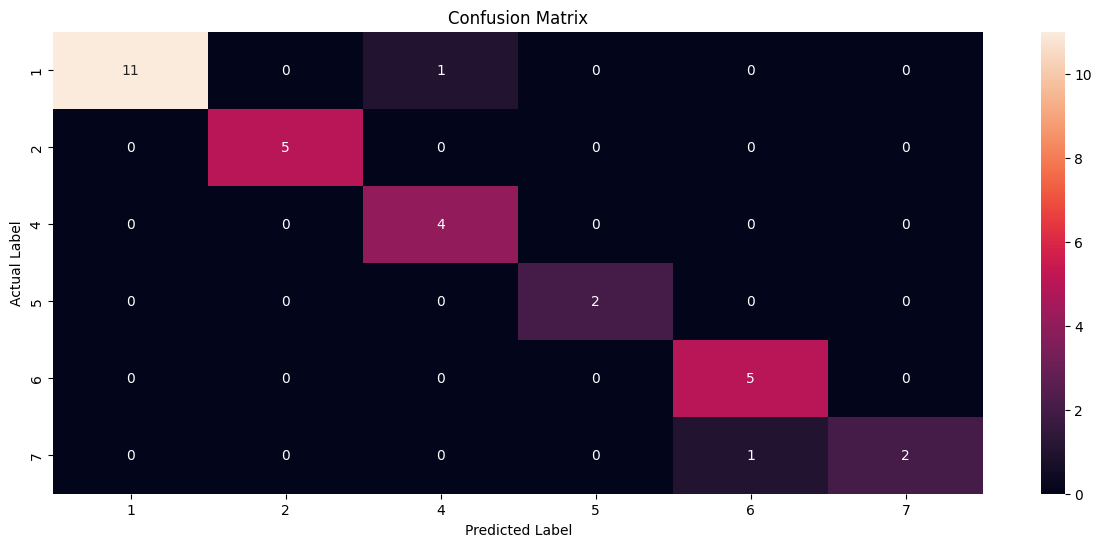

In [67]:

cm_df = confusion_matrix(y_test, pred_y)
class_label = ['1','2','4','5','6','7'] #class 3 is absent in test set

df_cm = pd.DataFrame(cm_df, index = class_label, columns = class_label)
plt.figure(figsize=(15,6))
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()